# Solow model with limited resources and climate change

In [100]:
# Import relevant packages
import numpy as np
from scipy import optimize
import sympy as sm
from ipywidgets import FloatSlider, interact

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

This model project investigates the Solow model with limited resources and damage from climate change. The Solow model is a neoclassical growth model, which describes long-run growth as a function of capital accumulation, population growth, technological change, a limited resource and climate change. The model is specified under the assumption that the economy is closed. 


We will model both a **baseline** solow model and the **extended** version to compare the two. 

# Baseline Solow model

The baseline Solow model uses the following variables:
1. Labour, $L_t$
2. Capital, $K_t$
3. Technology, $A_t$

as input in the Cobb-Douglas production function: 
$$
F(K_t,A_tL_t) = Y_t = K_t^\alpha(A_t L_t)^{1-\alpha}, \quad \alpha \leq 1
$$

Savings, $S_t$, are assumed to be a constant fraction of the income:
$$
S_t = sY_t, \quad 0 < s < 1
$$

and capital accumulates according to:

$$
K_{t+1} = S_t + (1-\delta)K_t, \quad 0 < \delta <1
$$
We furthermore assume that the workforce grows at a constant rate of n:
$$
L_{t+1} = (1+n)L_t, \quad n > -1
$$
And that technology grows at the rate of g:
$$
A_{t+1} = (1+g)A_t, \quad 0 < g < 1
$$

The production function exhibits constant returns to scale. Capital per effective worker is given by: 
$$
\frac{K_{t}}{A_{t}L_{t}} \equiv \tilde k
$$

The production function can be rewritten as: 
$$
F(K_t,A_tL_T)=K_t^\alpha (A_tL_t)^{1-\alpha} \rightarrow f(\tilde k) = \tilde k^\alpha
$$

The transition equation is thus given by: 
$$
\tilde k_{t+1}=\frac{1}{(1+n)(1+g)}[sf(\tilde k_t)+(1-\delta)\tilde k_t]
$$

# Extended Solow model

We extend the baseline Solow model to include an exhaustable ressource, e.g., oil, in the production function. The usage of the exhaustible ressource leads to climate change, which damages future production. 

In addition to the variables used in the standard Solow model, the following variables are included in the production function: 
 
4. The amount of the exhaustable natural ressource, which is used for production, $E_t$

5. The fraction of the production, which is damaged and thus lost due to climate change, $D_t$ 

The production function is given by: 


$$
Y_{t}=[1-D_{t}]K_{t}^\alpha(A_{t}L_{t})^\beta E_{t}^\varepsilon, \quad \alpha, \beta, \varepsilon >0, \quad  \alpha+\beta+\varepsilon=1
$$

The damage due to climate change is expressed by: 

$$
D_{t}=1-\left(\frac{R_{t}}{R_{0}}\right)^{\phi}, \quad \phi \ge 0
$$

The remaining amount of the exhaustable ressource, $R_t$, is given as the amount still left at the beginning of the proceeding period subtracted the amount used in production in the proceeding period: 
$$
R_{t+1}=R_{t}-E_{t}, \quad R_{0}\text{ is given.}
$$

The amount of the exhaustable ressource consumed each period is a constant fraction, sE, of the remaining ressource: 
$$
E_{t}=s_{E}R_{t}, \quad 0<s_{E}< 1
$$
The remaining equations are unchanged from the standard Solow model. Thus capital accumulates according to: 
$$
K_{t+1}=sY_{t}+(1-\delta)K_t,  \quad 0<s<1, \quad 0<\delta<1, \quad K_{0}>0 \text{ is given.}
$$
The population grows at a constant rate, n: 
$$
L_{t+1}=(1+n)L_{t}, \quad L_{0} \text{ is given.}
$$
And technology develops at the rate of g: 
$$
A_{t+1}=(1+g)A_{t}, \quad A_{0} \text{ is given.} 
$$


The capital-output ratio is given as: 
$$
z_t = \frac{K_t}{Y_t} = \frac{K^{1-\alpha}_t}{(\frac{R_t}{R_0})^\phi (A_tL_t)^\beta E_t^\epsilon}
$$

And the transition equation is then: 
$$
z_{t+1}=(\frac{1}{1-sE})^{\epsilon+\phi} (\frac{1}{(1+n)(1+g)})^\beta (s+(1-\delta)z_t)^{1-\alpha}z_t^\alpha
$$

# Numerical solution of the Solow model

In [101]:
from modelproject import Solowclass

Baseline Solow model. In the baseline model we solve for $ \tilde k$ (capital per effective worker): 

In [102]:
# Calling the class from the notebook
model = Solowclass()

# Set parameter values
model.paramtervalues()

# Solving for k*
model.solve_ss_k_par(kss=1)

The steady state for k in the standard Solow model is 4.680802838247644


The extended Solow model. In the extended model we solve for z (capital/output-ratio).

In [103]:
# Solving for z*
model.solve_ss_z_par(zss=1)

The steady state for z in the Solow model with an exhaustable resource and climate change is 4.0913116295145855


# Plotting convergence to steady state

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


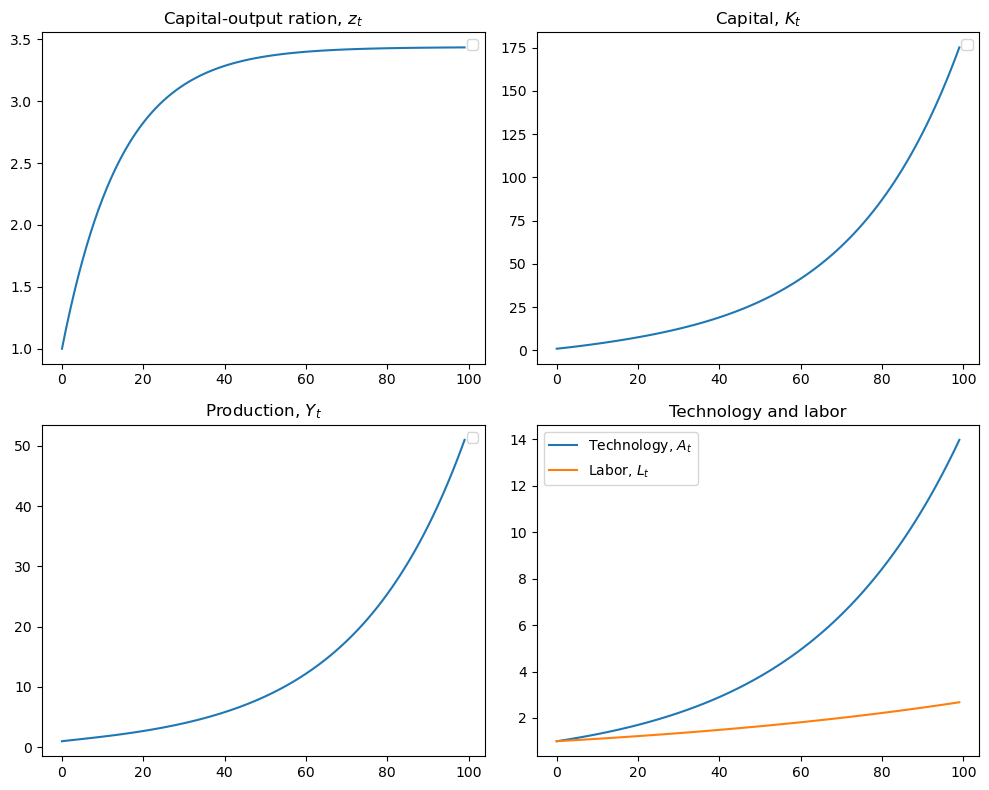

In [104]:
from modelproject import Solowclass

# Calling the class from the notebook
solow = Solowclass()
# load parameters
solow.paramtervalues()

# Simulating the baseline model 
solow.simulate(100,1,1,1);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


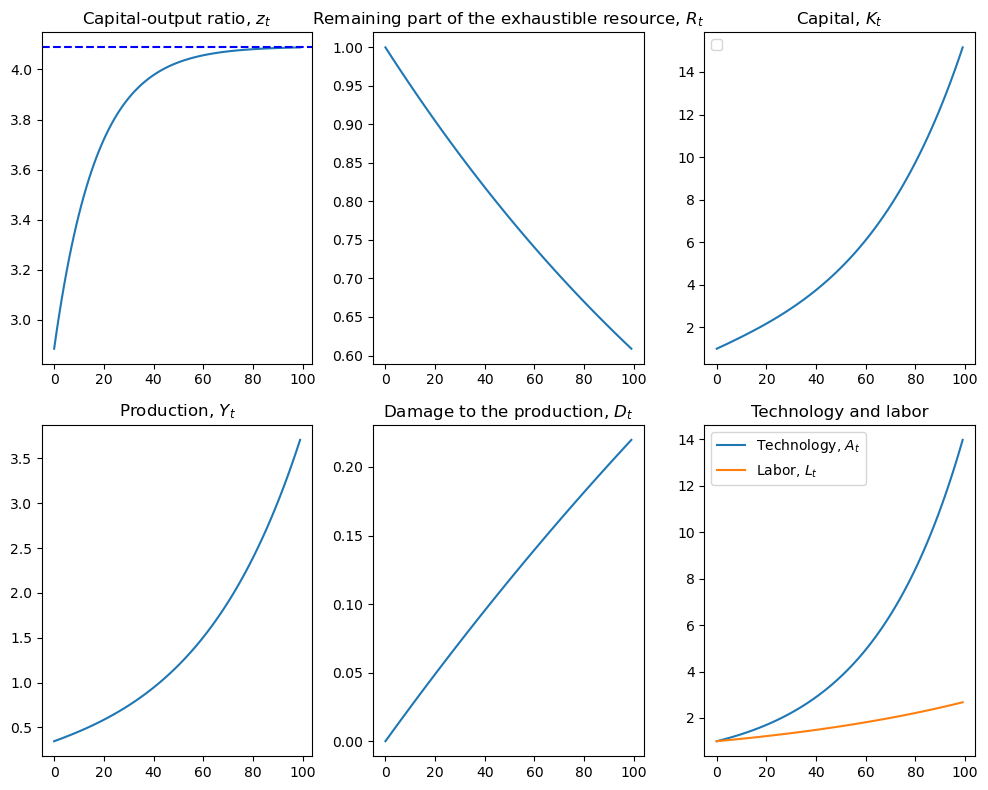

In [105]:
# Simulating the extended model 
solow.simulate_extended(100,1,1,1,1);

# Interactive plot 

Below, an interactive version of the convergence plot is shown. Using the widgets, different paramtervalues for $\alpha, \beta$ and $\phi$ can be chosen. When $\phi$ equals zero, the model is equivalent to a Solow model without damage due to climate change. Equivalently, when the sum of $\alpha$ and $\beta$ is equal to one, $\epsilon$ is zero, and thus the usage of an exhaustible ressource is excluded from the production function, and thus the model becomes equivalent to the standards Solow model. 


In [106]:
# define widgets for the interactive plot
alpha_widget = FloatSlider(min=0, max=1, step=0.01, value=0.2, description='alpha')
beta_widget = FloatSlider(min=0, max=1, step=0.01, value=0.6, description='beta')
phi_widget = FloatSlider(min=0, max=1, step=0.01, value=0.5, description='phi')

interact(solow.simulation_widget_extended, alpha=alpha_widget, beta=beta_widget, phi=phi_widget)

interactive(children=(FloatSlider(value=0.2, description='alpha', max=1.0, step=0.01), FloatSlider(value=0.6, …

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>